In [1]:
#the goal is to predict bad_loan
import pandas as pd
df=pd.read_csv('/Users/chidam/Desktop/lending_club_loan.csv')
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified


In [2]:
#First convert months into years. So 36 months become 3 (years) and 60 months become 5 (years)
df['term'] = [3 if x == '36 months' else 5 for x in df['term']]

In [3]:
len(df)

163987

In [5]:
#Checking how many bad loans are in the dataset. This is the minority class label and as expected
#its count is much smaller than the majority class label: bad_loan==0 (if bad_loan==1 then it is a bad loan )
len(df[df['bad_loan']==1])

30016

In [7]:
#Checking how many non-bad loans are in the dataset. The number of non-bad loans outnumbers the number of bad loans giving
#rise to a situation of an imbalanced dataset 
len(df[df['bad_loan']==0]) #(if bad_loan==0 then it is not a bad loan )

133971

In [71]:
dti: debt to income ratio (<=40)





SyntaxError: invalid syntax (<ipython-input-71-a283ef6daae6>, line 1)

In [8]:
df['total_acc'].unique()

array([  9.,   4.,  10.,  37.,  12.,  13.,   3.,  23.,  34.,  11.,  29.,
        28.,  42.,  14.,  38.,  21.,  17.,   7.,  31.,  22.,  44.,  26.,
        16.,   6.,  18.,  27.,  25.,  40.,  35.,  24.,   8.,  20.,  15.,
        19.,  36.,  51.,  32.,  30.,  33.,  46.,   5.,  61.,  56.,  50.,
        41.,  79.,  43.,  47.,  53.,  45.,  60.,  55.,  39.,  52.,  58.,
        54.,  57.,  49.,  63.,  48.,  59.,  62.,  77.,  87.,  75.,  72.,
        64.,  67.,  78.,  76.,  74.,  66.,  81.,  90.,  80.,  71.,  69.,
        73.,  70.,  68.,  65.,   2.,   1.,  nan,  88.,  82.,  91.,  99.,
        92.,  85.,  93.,  83.,  84., 118.,  94., 102.,  95.])

In [9]:
#let's check whether the column term is of integer type
df['term'].dtype
    

dtype('int64')

In [10]:
#next step is to convert the columns with text values into numeric type
#Does None mean the customers do not own any home?
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [11]:
#check with Ram whether they collect any evidence from customers to prove the purpose
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [12]:
df['verification_status'].unique()

array(['verified', 'not verified'], dtype=object)

In [13]:
len(df['addr_state'].unique())

50

In [14]:
#first try to convert the text values into numeric ones using pd.get_dummies
df = pd.concat([df.drop('home_ownership', axis=1), pd.get_dummies(df['home_ownership'], drop_first=True)], axis=1)

In [15]:
#To convert the column: purpose the similar way as above 
df = pd.concat([df.drop('purpose', axis=1), pd.get_dummies(df['purpose'], drop_first=True)], axis=1)

In [16]:
#It is time to convert the verification_status column values. To make it bit more punitive efficient have assigned -1 to 'not verified' value in the column: verification_status
#df['verification_status'] = [1 if x == 'verified' else -1 for x in df['verification_status']]
df = pd.concat([df.drop('verification_status', axis=1), pd.get_dummies(df['verification_status'], drop_first=True)], axis=1)

In [17]:
#The column: addr_state has 50 states as values so there will be a lot of 1s and 0s. But for now going to stick with pd.get_dummies
df = pd.concat([df.drop('addr_state', axis=1), pd.get_dummies(df['addr_state'], drop_first=True)], axis=1)

In [18]:
df = df.fillna(0)

In [19]:
#Assign y the values to be predicted
y=df['bad_loan'].values

In [20]:
#y=pd.factorize(df['bad_loan'].values)[0].reshape(-1, 1)

In [21]:
y

array([0, 1, 0, ..., 0, 0, 0])

In [22]:
#Drop y from the rest of the dataframe and assign the result to X
df=df.drop('bad_loan', axis=1)

In [23]:
#df.columns = df.iloc[0]


In [24]:
#df.isnull().any()

In [25]:
X=df.values

In [26]:
X

array([[5.0000e+03, 3.0000e+00, 1.0650e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.5000e+03, 5.0000e+00, 1.5270e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.4000e+03, 3.0000e+00, 1.5960e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.2825e+04, 3.0000e+00, 1.7140e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.7650e+04, 5.0000e+00, 2.1990e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.7000e+04, 5.0000e+00, 1.5990e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [27]:
#Have to know more about the fields in order to meaningfully assign values to null values in the dataset. For now keeping
#it simple and replacing all the null values in the dataset with 0


In [28]:
#X.isnull().any()

In [29]:
#While doing this step be cautious, because if you refresh it again and again then you risk exposing all parts of the dataset to the model
#So there is literally no separate or untouched test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Not planning to touch X_test and y_test as they are the real test data

In [30]:
#Fitting Logistic Regression model to the data

In [31]:
#Getting training and validation sets from X_train and y_train. The ideais to keep the X_test and y_test aside
X_train1, X_valid1, y_train1, y_valid1=train_test_split(X_train, y_train, random_state=42)

#Planning to use X_train1, y_train1 for training set and
#X_valid1, y_valid1 for validation set

In [32]:
len(X_train1)

92242

In [33]:
len(y_train1)

92242

In [34]:
y_valid1.shape

(30748,)

In [35]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train1, y_train1)


In [36]:
y_pred=clf.predict(X_valid1)

In [37]:
y_pred.shape

(30748,)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_valid1, y_pred))

             precision    recall  f1-score   support

          0       0.82      1.00      0.90     25200
          1       1.00      0.00      0.00      5548

avg / total       0.85      0.82      0.74     30748



In [39]:
#clf.score(y_pred, y_valid1)

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf_rf.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [41]:
y_pred_rf=clf_rf.predict(X_valid1)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_valid1, y_pred_rf))

             precision    recall  f1-score   support

          0       0.82      1.00      0.90     25200
          1       0.00      0.00      0.00      5548

avg / total       0.67      0.82      0.74     30748



/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada=AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R', random_state=40)
clf_ada.fit(X_train1, y_train1)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=40)

In [44]:
y_pred_ada=clf_ada.predict(X_valid1)

In [45]:
print(classification_report(y_valid1, y_pred_ada))

             precision    recall  f1-score   support

          0       0.82      0.99      0.90     25200
          1       0.47      0.03      0.05      5548

avg / total       0.76      0.82      0.75     30748



In [ ]:
#I haven't tested the above three models' performance on unseen test data. Before that going to illustrate few significant
measure of doing powerful feature engineering

In [238]:
#Now let us see the importance of feature engineering and when done fairly right what it can bring to table

df2=pd.read_csv('/Users/chidam/Desktop/lending_club_loan.csv')


In [239]:
df2.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified


In [240]:
#First convert months into years. So 36 months become 3 (years) and 60 months become 5 (years)
df2['term'] = [3 if x == '36 months' else 5 for x in df2['term']]

In [241]:
df2.loc[df2['verification_status']=='not verified', 'verification_status']=-1

df2.loc[df2['verification_status']=='verified', 'verification_status']=1



In [242]:
df2['verification_status'].head()

0     1
1     1
2    -1
3     1
4     1
Name: verification_status, dtype: object

In [243]:
df2.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,3,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,1
1,2500,5,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,1
2,2400,3,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,-1
3,10000,3,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,1
4,5000,3,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,1


In [244]:
#Let's plot features: home_ownership Vs. bad_loan in order to understand how we can meaningfully encode the feature home_ownership


#import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# x = df2['home_ownership'].values
# y = df2['bad_loan'].values
# plt.boxplot(x, y)
# plt.show()

#sns.violinplot(x=df2['home_ownership'].values, y=df2['bad_loan'].values);

#sns.catplot(x="home_ownership", y="bad_loan", data=[x, y]);


In [50]:
#sns.barplot(x=df2['home_ownership'].values, y=df2['bad_loan'].values);

In [245]:
#The idea is to filter the dataframe where the condition bad_loan==1 gets satisfied as it will be useful then to groupby
#purpose and count the values per each category of the column:purpose
df2_purpose1=df2.loc[df2['bad_loan']==1]

In [246]:
df2['bad_loan'].values

array([0, 1, 0, ..., 0, 0, 0])

In [247]:
#Total count of bad_loan per category in the column:home_ownership
grouped_loan_home=df2.groupby('home_ownership')['bad_loan'].count()

In [248]:
grouped_loan_home

home_ownership
ANY             1
MORTGAGE    79714
NONE           30
OTHER         156
OWN         13560
RENT        70526
Name: bad_loan, dtype: int64

In [249]:
grouped_loan_home.index.values

array(['ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'], dtype=object)

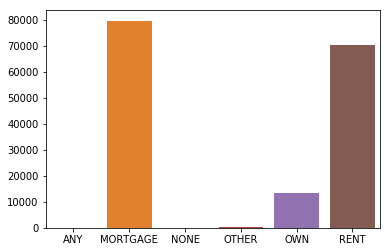

In [250]:
#I grouped the bad_loan according to categories in home_ownership and plotting the groupedby value and index using seaborn
sns.barplot(grouped_loan_home.index.values, grouped_loan1.values)

In [251]:
# Clearly 'MORTGAGE' and 'RENT' are the dominating categories. Target Encoding can be used to transform the values using the target mean calculated per each category
#Let us find out how many of bad_loan==1 are in each category of 'home_ownership'

group_loan_home_1=df2_purpose1.groupby('home_ownership')['bad_loan'].count()


In [252]:
encode_home=round(group_loan_home_1/grouped_loan_home, 2)

In [253]:
def target_purpose(x, y, col_name):
    for i, v in list(zip(x, y)):
        df2.loc[df2[col_name]==i, col_name]=v
    return df2[col_name].head()
        
    
target_purpose(encode_home.index.tolist(), encode_home.values, 'home_ownership')

0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: home_ownership, dtype: object

In [56]:
# annual_inc Vs. loan_amnt
#sns.barplot(x=df2['annual_inc'].values, y=df2['loan_amnt'].values);

In [ ]:
#Planning to 

In [254]:
#Check the Purpose column
df2['purpose'].unique()



array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [255]:
#Grouping bad_loan by purpose in order to check the distribution for the purpose of encoding

grouped_loan_purpose=df2.groupby('purpose')['bad_loan'].count()




In [256]:
grouped_loan_purpose_1=df2_purpose1.groupby('purpose')['bad_loan'].count()

In [257]:
grouped_loan_purpose_1

purpose
car                     358
credit_card            4843
debt_consolidation    17671
educational              88
home_improvement       1539
house                   227
major_purchase          643
medical                 412
moving                  304
other                  2249
renewable_energy         45
small_business         1187
vacation                196
wedding                 254
Name: bad_loan, dtype: int64

In [258]:
#To check how the not verified category of verification_status Vs. bad_loan==1

group_status=df2_purpose1.groupby('verification_status')['bad_loan'].count()

group_status

verification_status
-1     8961
 1    21055
Name: bad_loan, dtype: int64

In [259]:
8961/59155

0.15148339109120107

In [260]:
21055/104832

0.2008451617826618

In [261]:
grouped_loan_purpose

# I get a lot of 1s and 0s if I use pd.get_dummies to encode this field as used above in part:1 but it is not a good strategy to encode 
# information as it might cause multicollinearity amongst predictor variables. What is the problem of multicollinearity? One of the problems is that the higher
# the multicollinearity higher the standard error. 

# Clearly, debt_consolidation, credit_card, other are the prominent categories with debt_consolidation leading in the rank of quantity.

# Target encoding could be a good strategy to have all the categories but with meaningful frequency values.

purpose
car                    2842
credit_card           30792
debt_consolidation    93261
educational             418
home_improvement       9872
house                  1245
major_purchase         4686
medical                2029
moving                 1464
other                 10492
renewable_energy        198
small_business         3841
vacation               1096
wedding                1751
Name: bad_loan, dtype: int64

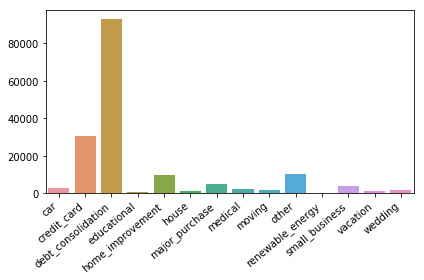

In [262]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(8,4))

ax = sns.barplot(grouped_loan_purpose.index.values, grouped_loan_purpose.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [263]:
#Checking the verification_status column to see how many bad loans does each category consists of
group_loan_status=df2.groupby('verification_status')['bad_loan'].count()

In [264]:
group_loan_status

#The not verified category in the column: verification_status comes across as the majority and the verified category obviously as the 
#minority one. Because it is a binary variable category I am going to encode the not verified with -1 and the verified ones with 1


verification_status
-1     59155
 1    104832
Name: bad_loan, dtype: int64

In [265]:
#To implement Target Encoding for the column: purpose

# To implement target encoding of the column: purpose we have to divide the count stored in grouped_loan_purpose_1 per category by
# total count value stored in grouped_loan_purpose.

encode_purpose=round(grouped_loan_purpose_1/grouped_loan_purpose, 2)
encode_purpose

purpose
car                   0.13
credit_card           0.16
debt_consolidation    0.19
educational           0.21
home_improvement      0.16
house                 0.18
major_purchase        0.14
medical               0.20
moving                0.21
other                 0.21
renewable_energy      0.23
small_business        0.31
vacation              0.18
wedding               0.15
Name: bad_loan, dtype: float64

In [127]:


#df2.loc[df2['verification_status']=='not verified', 'verification_status']=-1

for i, v in list(zip(encode_purpose.index.tolist(), encode_purpose.values)):
    print(i)




car
credit_card
debt_consolidation
educational
home_improvement
house
major_purchase
medical
moving
other
renewable_energy
small_business
vacation
wedding


In [266]:
#It is time to substitute these values for the category labels in the column: purpose
#For example: wherever car is seen in the column:purpose it will be replaced by 0.13

#This function is used for target encoding the categorical columns
        
def target_purpose(x, y, col_name):
    for i, v in list(zip(x, y)):
        df2.loc[df2[col_name]==i, col_name]=v
    return df2[col_name].head()
        
    
target_purpose(encode_purpose.index.tolist(), encode_purpose.values, 'purpose')

0    0.16
1    0.13
2    0.31
3    0.21
4    0.15
Name: purpose, dtype: object

In [267]:
#The state labels in the column: addr_state can also be target encoded in the similar way the values in the column:purpose 
#are transformed. As there are 50 unique state labels and so dummy encoding them will create more number of features and also might
#cause correlation amongst the predictor variables


#The original dataframe, df2 in part:2 can be used to get the total count of bad_loan per each state (grouped by addr_state)
    
group_loan_state= df2.groupby('addr_state')['bad_loan'].count()   



In [268]:
group_loan_state

addr_state
AK      413
AL     1965
AR     1104
AZ     3941
CA    28702
CO     3531
CT     2563
DC      584
DE      445
FL    11396
GA     5189
HI      955
IA       12
ID        9
IL     6099
IN     1463
KS     1335
KY     1477
LA     1885
MA     4164
MD     3890
ME        3
MI     3762
MN     2771
MO     2627
MS      163
MT      483
NC     4393
NE       13
NH      752
NJ     6457
NM      839
NV     2387
NY    14285
OH     4896
OK     1331
OR     2149
PA     5427
RI      695
SC     1826
SD      317
TN     1327
TX    12128
UT     1389
VA     5282
VT      270
WA     3823
WI     1980
WV      714
WY      376
Name: bad_loan, dtype: int64

In [269]:

#The result stored in df2_purpose1 can be used again to get the count of values when bad_loan==1 grouped by addr_state

group_loan_state_1=df2_purpose1.groupby('addr_state')['bad_loan'].count()

In [270]:
encode_state=round(group_loan_state_1/group_loan_state, 2)

In [271]:
def target_purpose(x, y, col_name):
    for i, v in list(zip(x, y)):
        df2.loc[df2[col_name]==i, col_name]=v
    return df2[col_name].head()
        
    
target_purpose(encode_state.index.tolist(), encode_state.values, 'addr_state')

0    0.17
1    0.18
2    0.18
3    0.18
4    0.17
Name: addr_state, dtype: object

In [272]:
df2.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,3,10.65,10.0,0.2,24000.0,0.16,0.17,27.65,0.0,83.7,9.0,0,26.0,1
1,2500,5,15.27,0.0,0.2,30000.0,0.13,0.18,1.00,0.0,9.4,4.0,1,12.0,1
2,2400,3,15.96,10.0,0.2,12252.0,0.31,0.18,8.72,0.0,98.5,10.0,0,10.0,-1
3,10000,3,13.49,10.0,0.2,49200.0,0.21,0.18,20.00,0.0,21.0,37.0,0,15.0,1
4,5000,3,7.90,3.0,0.2,36000.0,0.15,0.17,11.20,0.0,28.3,12.0,0,7.0,1


In [ ]:
Target Encoding for addr_state

What is target encoding?
It is a technique to encode categorical variables using mean value of target variables/values.
We have 50 states in the addr_state column. In the earlier session we saw the implementation of pd.get_dummies to encode 
the column values with 0 and 1. What is the problem with that?
For example, for illustration purpose let us consider the following table:
    
addr_state
    CA

bad_loan
1
0
1
0
1
1
1

The column bad_loan is our target variable. Target encoding is implemented by finding the mean value, but there is rather a notable
point. The mean is calculated by counting the number of 1s divided by the total number of 0s and 1s for the state of California (CA).
So the target encoding for CA = 5/7 as there 5 1s and 7 entries in total.
Similarly the values are calculated for the rest of the states in the column.



In [ ]:
check the verification_status column and pick suitable values to encode 

In [ ]:
Thinking about normalization!
Well, the tree methods should be fairly robust to outliers in the input features since the base learners are tree splits.
So not going to worry about removing outliers in order to boost the classifier performance.
But not all the time. In case of regression and in situation of huge deviations in the dependent variable values the 

the implementation of Random Forest Classifier and Adaboost Classifier with Decision Tree as base estimators do not
necessarily 


In [274]:
#To print the column names with null values in the dataframe
#df2[df2.isnull().any(axis=1)]


df2.columns[df2.isnull().any()]



Index(['emp_length', 'home_ownership', 'annual_inc', 'addr_state',
       'delinq_2yrs', 'revol_util', 'total_acc', 'longest_credit_length'],
      dtype='object')

In [275]:
df2['emp_length'].unique()

array([10.,  0.,  3.,  9.,  4.,  5.,  1.,  6.,  2.,  7.,  8., nan])

In [276]:
#Grouping bad_loan by emp_length to get more insights about the column
group_loan_emplength= df2.groupby('emp_length')['bad_loan'].count()   



In [277]:
#But NaN values do not get listed
group_loan_emplength

emp_length
0.0     14248
1.0     11414
2.0     15766
3.0     13611
4.0     11024
5.0     12347
6.0     10000
7.0      9079
8.0      7424
9.0      6087
10.0    47183
Name: bad_loan, dtype: int64

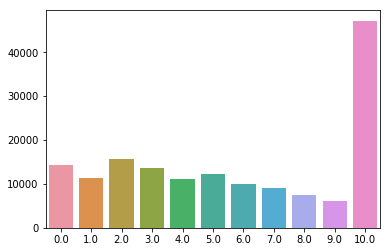

In [157]:
sns.barplot(group_loan_emplength.index.values, group_loan_emplength.values)


In [ ]:
Instead of just filling null values with 0 there is a better way to deal with them

The columns with NaN values are:
    
['emp_length', 'home_ownership', 'annual_inc', 'addr_state','delinq_2yrs', 'revol_util', 'total_acc', 'longest_credit_length']
The idea is to fill the null values in the columns based on the following:
For numerical features: replace the null values with either mean or median    
For categorical features: replace the null values with the most frequent class/variable in the column

In [167]:
#To return the rows with NaN values in a particular column in the dataframe
df2.loc[df2['emp_length'].isnull()]


,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
153,2500,3,7.51,NaN,0.19,12000.00,0.19,0.18,16.30,0.0,42.2,20.0,1,17.0,1
352,4000,3,11.71,NaN,0.2,24000.00,0.16,0.21,7.50,1.0,54.9,6.0,0,6.0,1
377,1000,3,14.65,NaN,0.2,18408.00,0.14,0.2,6.00,0.0,83.7,8.0,1,18.0,-1
390,8250,3,7.51,NaN,0.16,31500.00,0.19,0.18,17.87,0.0,10.4,37.0,0,30.0,1
476,1700,3,7.90,NaN,0.16,37800.00,0.16,0.14,27.00,0.0,91.2,27.0,1,32.0,-1
496,5000,3,8.90,NaN,0.16,70000.00,0.21,0.18,16.17,1.0,53.0,32.0,0,28.0,1
503,3000,3,9.91,NaN,0.16,42000.00,0.23,0.18,4.29,0.0,33.3,3.0,0,6.0,-1
508,8575,3,17.58,NaN,0.16,32000.00,0.19,0.21,22.54,0.0,89.9,5.0,1,7.0,1
604,5600,3,6.03,NaN,0.19,41100.00,0.13,0.19,3.97,0.0,2.7,44.0,0,21.0,-1
668,14125,3,12.42,NaN,0.16,45696.00,0.19,0.19,21.93,0.0,91.5,26.0,1,11.0,1


In [278]:
#Let's find out the median of emp_length and replace the NaN values with it

df2.loc[df2['emp_length'].isnull(), 'emp_length']=df2['emp_length'].median()



In [279]:
#Let's check this one time whether the null values in the column: emp_length has really been replaced with the median value of the column

#We shall run the group by command from above to check whether the count has gone up for 6.0

df2.groupby('emp_length')['bad_loan'].count() 

#As can be seen the count for emp_length=6.0 has gone up from 10000 to 15804 as the null values are replaced with the median value 6.0

emp_length
0.0     14248
1.0     11414
2.0     15766
3.0     13611
4.0     11024
5.0     12347
6.0     15804
7.0      9079
8.0      7424
9.0      6087
10.0    47183
Name: bad_loan, dtype: int64

In [280]:
#to deal with null values in the column: 'home_ownership'. This is a categorical column so we have to replace the null
#values using the frequent variable in the column. Note that the categorical values in the column were already replaced
# with numerical value through target encoding at this time. So we will get a numerical value as result to find the mode of
# the column. We are doing this step in backwards. Ideally, one can check for null values before starting feature engineering step
#replace the NaN values with the most frequent variable and then convert every categorical variable into numerical value. But doing this way is not wrong either.

df2['home_ownership'].mode()




0    0.16
dtype: object

In [281]:
df2.loc[df2['home_ownership'].isnull(), 'home_ownership']=df2['home_ownership'].mode()

In [282]:
#Similarly the null values are replaced for the numerical feature: 'annual_inc' 
df2.loc[df2['annual_inc'].isnull(), 'annual_inc']=df2['annual_inc'].median()

In [283]:
#Replacing null values for categorical features:'delinq_2yrs', 'revol_util', 'total_acc', 'longest_credit_length'
df2.loc[df2['delinq_2yrs'].isnull(), 'delinq_2yrs']=df2['delinq_2yrs'].median()
df2.loc[df2['revol_util'].isnull(), 'revol_util']=df2['revol_util'].median()
df2.loc[df2['total_acc'].isnull(), 'total_acc']=df2['total_acc'].median()
df2.loc[df2['longest_credit_length'].isnull(), 'longest_credit_length']=df2['longest_credit_length'].median()






In [284]:
#Replacing null values for categorical features:'addr_state',  
df2.loc[df2['addr_state'].isnull(), 'addr_state']=df2['addr_state'].mode()



In [285]:
#Now, let's check whether df2 still consists of any null values. Even after replacing null values with median and mode they exist
#in the following two columns. There could be some special characters or space that could be bothering the replacing of 
#null values
df2.columns[df2.isnull().any()]

Index(['home_ownership', 'addr_state'], dtype='object')

In [286]:
#Going to replace null values in the columns manually.
#Note: df2['addr_state'].mode() = 0.18

df2.loc[df2['addr_state'].isnull()]=0.18


In [287]:
#Luckily the null values in the column:addr_state are replaced now
df2.columns[df2.isnull().any()]

Index(['home_ownership'], dtype='object')

In [288]:
#Likewise the one record with null value in the column:home_ownership can be replaced manually
#Note: df2['home_ownership'].mode() = 0.16

df2.loc[df2['home_ownership'].isnull(), 'home_ownership']=0.16

In [289]:
#Hooray, there are no null values in any column in the dataframe
df2.columns[df2.isnull().any()]

Index([], dtype='object')

In [ ]:
#Deal with imbalanced class in the column: bad_loan




In [294]:
y=df2['bad_loan'].astype(int).values

In [295]:
y

array([0, 1, 0, ..., 0, 0, 0])

In [296]:
df2=df2.drop('bad_loan', axis=1)

In [297]:
X=df2.values

In [306]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=42)

In [307]:
X_train22, X_valid22, y_train22, y_valid22=train_test_split(X_train2, y_train2, random_state=42)

In [308]:
#Logistic Regression

clf_log = LogisticRegression(random_state=42, solver='lbfgs', multi_class='ovr').fit(X_train22, y_train22)
y_pred_log=clf_log.predict(X_valid22)
print(classification_report(y_valid22, y_pred_log))

             precision    recall  f1-score   support

          0       0.82      1.00      0.90     25200
          1       0.35      0.00      0.00      5548

avg / total       0.74      0.82      0.74     30748



In [311]:
#Random Forest
clf_rf2 = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42, class_weight="balanced")
clf_rf2.fit(X_train22, y_train22)
y_pred_rf=clf_rf2.predict(X_valid22)
print(classification_report(y_valid22, y_pred_rf))

             precision    recall  f1-score   support

          0       0.89      0.65      0.75     25200
          1       0.28      0.62      0.38      5548

avg / total       0.78      0.64      0.68     30748



In [317]:
#Ada Boost Classifier
from sklearn.tree import DecisionTreeClassifier 
clf_ada2=AdaBoostClassifier(base_estimator=(DecisionTreeClassifier(max_depth=4, class_weight="balanced")), n_estimators=100, learning_rate=1.0, algorithm='SAMME.R', random_state=40)
clf_ada2.fit(X_train22, y_train22)
y_pred_ada=clf_ada2.predict(X_valid22)
print(classification_report(y_valid22, y_pred_rf))

             precision    recall  f1-score   support

          0       0.89      0.65      0.75     25200
          1       0.28      0.62      0.38      5548

avg / total       0.78      0.64      0.68     30748



In [ ]:
There are many other methods to implement a better feature engineering process. In target encoding, it turns out it is 
even better to calculate weighted average of the overall mean of the training set and the mean of the level:
